In [31]:
# Just load modules that are used later...
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Notes for Journal Club 2016/02/23

* Title:	 A Critical Review of Recurrent Neural Networks for Sequence Learning
* Authors:	Lipton, Zachary C.; Berkowitz, John; Elkan, Charles
* Publication Date:	05/2015
* URL: http://arxiv.org/abs/1506.00019
* Keywords:	Computer Science - Learning, Computer Science - Neural and Evolutionary Computing
* Abstract
> Countless learning tasks require dealing with sequential data. Image captioning, speech synthesis, and music generation all require that a model produce outputs that are sequences. In other domains, such as time series prediction, video analysis, and musical information retrieval, a model must learn from inputs that are sequences. Interactive tasks, such as translating natural language, engaging in dialogue, and controlling a robot, often demand both capabilities. Recurrent neural networks (RNNs) are connectionist models that capture the dynamics of sequences via cycles in the network of nodes. Unlike standard feedforward neural networks, recurrent networks retain a state that can represent information from an arbitrarily long context window. Although recurrent neural networks have traditionally been difficult to train, and often contain millions of parameters, recent advances in network architectures, optimization techniques, and parallel computation have enabled successful large-scale learning with them. In recent years, systems based on long short-term memory (LSTM) and bidirectional (BRNN) architectures have demonstrated ground-breaking performance on tasks as varied as image captioning, language translation, and handwriting recognition. In this survey, we review and synthesize the research that over the past three decades first yielded and then made practical these powerful learning models. When appropriate, we reconcile conflicting notation and nomenclature. Our goal is to provide a self-contained explication of the state of the art together with a historical perspective and references to primary research.



## Main topics
* Reccurent Neural Networks (RNNs)
    * LSTM (Long short-term memory)
    * Bidirectional Neuroal Networks (BRNN)
* Distributed Represantation
    * Word2Vec
* Applications
    * Language translation
    * Image Capturing

# Architectures

## Feedfoward Neural Network
<img src=FNN.png width=400px>

## Reccurent Neural Network
<img src=RNN1.png width=800px>

A verbose discription
<img src=RNN2.png width=800px>
xt-1でなくxt

 $$
 \mathbf{h}^{(t)} = \sigma(W^{hx}\mathbf{x}^{(t)} + W^{hh}\mathbf{h}^{(t-1)}) \\
 \mathbf{y}^{(t)} = \mathrm{softmax}(W^{yh}\mathbf{h}^{(t)})
 $$

## LSTM
<img src=https://qiita-image-store.s3.amazonaws.com/0/60969/91876b7a-bf2a-5585-a0bf-c6600c6d638e.png width=800px>
Retrieved from [Here](http://qiita.com/t_Signull/items/21b82be280b46f467d1b).
<img src=LSTM.png width=800px>
Fig 10: LSTM memory cell with a forget gate as  described by Gers et al. 2000

$$
\mathbf{g}^{(t)} = \phi (W^{gx} \mathbf{x}^{(t)} + W^{gh} \mathbf{h}^{(t-1)}) \\
\mathbf{i}^{(t)} = \sigma (W^{ix} \mathbf{x}^{(t)} + W^{ih} \mathbf{h}^{(t-1)}) \\
\mathbf{f}^{(t)} = \sigma (W^{fx} \mathbf{x}^{(t)} + W^{fh} \mathbf{h}^{(t-1)}) \\
\mathbf{o}^{(t)} = \sigma (W^{ox} \mathbf{x}^{(t)} + W^{oh} \mathbf{h}^{(t-1)}) \\
\mathbf{s}^{(t)} = \mathbf{g}^{(t)} \otimes \mathbf{i}^{(t)} + \mathbf{s}^{(t-1)} \otimes \mathbf{f}^{(t)}\\
\mathbf{h}^{(t)} = \phi (\mathbf{s}^{(t)}) \otimes \mathbf{o}^{(t)}
$$

A verbose discription
<img src=LSTM_verbose.png width=800px>

<img src=gates.png width=800px>

## BRNN 
<img src=BRNN.png width=800px>

# Applications

## Word2Vec (Skip-gram)

### Unigram
$$
P(w) = \frac{\mathrm{number\ of\ appearance\ of\ w}}{\mathrm{total\ number\ of\ words}}
$$
### Skip-gram model
* w: word
* c: context (word that appeared around w)
$$
J = - \sum_{w \in D} \sum_{c \in C_w} \log P(c|w)
$$


Where
$$
P(c|w) = \frac{\exp{(\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c})}
{\sum_{c' \in V}\exp{(\mathbf{v}_m\cdot\tilde{\mathbf{v}}_{c'}})}
$$

## Negative Sampling
$P(c|w)$ can be approximated by
$$
P(c|w) \approx P(+1 | w, c) \prod_{c'\in \mathrm{Unigram}_k(D)} P(-1|w, c')
$$
Here
* $P(+1 | w, c)$: a probability that word $c$ is one of the context of $w$
* $P(-1|w, c')$: a probability that word $c$ is not the context of $w$
* $\mathrm{Unigram}_k(D)$: k context that are sampled from $P(w)$. (pseudo) negative sampling

If we use logistic regression as a model...
$$
P(+1 | w, c) = \sigma (\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c) \\
P(-1 | w, c) = \sigma (-\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c)
$$

Thus,
$$
P(c|w) \approx \sigma(\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c) \prod_{c'\in \mathrm{Unigram}_k(D)}\sigma(-\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c')
$$

After all,
$$
J = - \sum_{w \in D} \sum_{c \in C_w}( \log \sigma(\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c) +\sum_{c'\in \mathrm{Unigram}_k(D)}\log\sigma(-\mathbf{v}_m\cdot \tilde{\mathbf{v}}_c') )
$$

word2vec reduce above equation with SGD.

### Negative Sampling

## Examples
<img src=http://web.mit.edu/amarbles/www/docs/word2vec_PCA.png width=800px>
Retreived from [Here](http://web.mit.edu/amarbles/www/neuro_word2vec.html).

In [33]:
with open("final_embeddings.dump", "rb") as rf:
    final_embeddings = pickle.load(rf)

In [35]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y),
                                 xytext=(5, 2),
                                 textcoords='offset points',
                                 ha='right',
                                 va='bottom')

    plt.show()

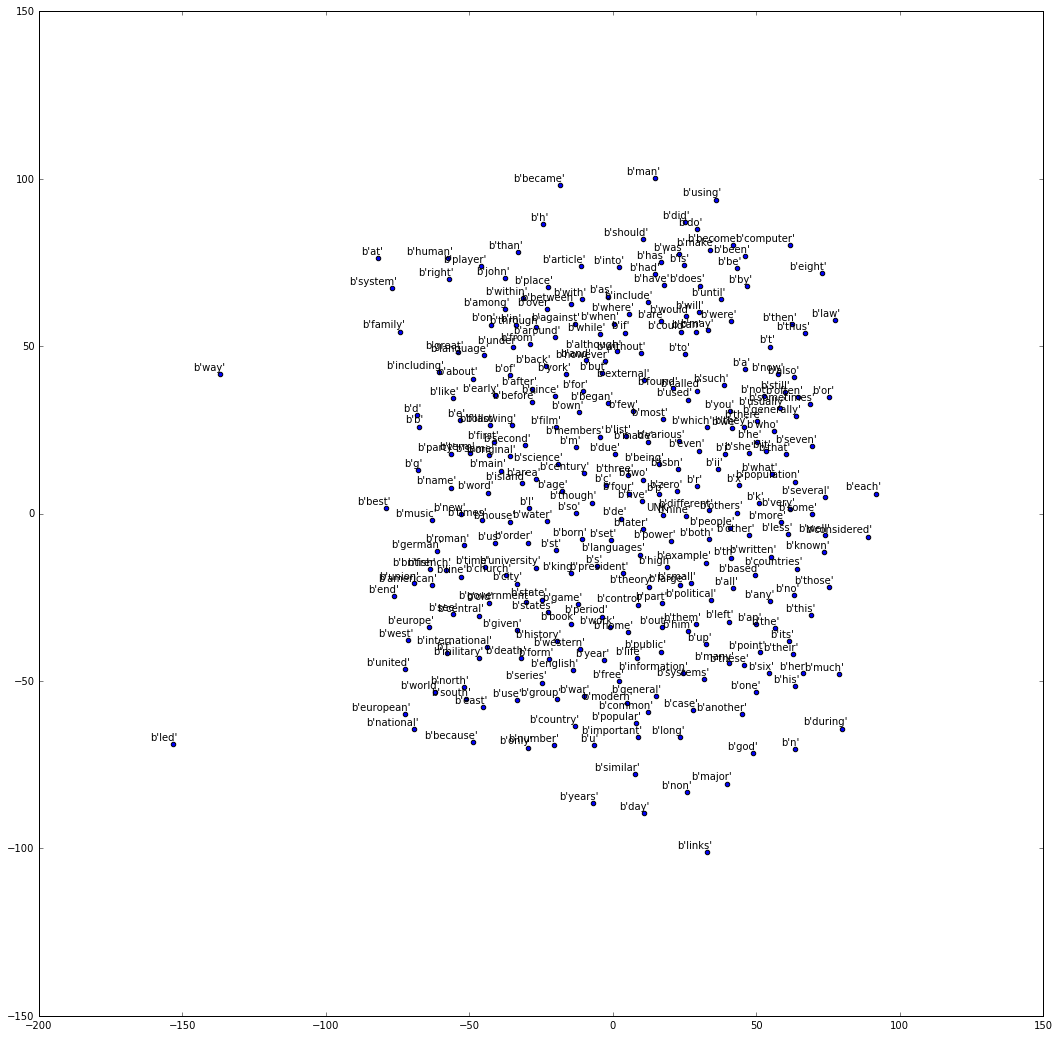

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 300
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [reverse_dictionary[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)

The code that generates the result are in wor2vec_basic.ipynb that retrived  from [Here](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py) (and slightly modified). For more information, see [Here](https://www.tensorflow.org/versions/r0.7/tutorials/word2vec/index.html#highlights).

## Natural Language Translation

<img src=https://qiita-image-store.s3.amazonaws.com/0/100698/949b1930-5db2-008c-4db1-ad24b2eea4fe.png width=800px>

${\begin{align}
{\bf i}_n & = \tanh \bigl( W_{xi} \cdot {\bf x}_n \bigr), \\
{\bf p}_n & = {\rm LSTM} \bigl( W_{ip} \cdot {\bf i}_n + W_{pp} \cdot {\bf p}_{n-1} \bigr), \\
{\bf q}_1 & = {\rm LSTM} \bigl( W_{pq} \cdot {\bf p}_{|{\bf w}|} \bigr), \\
{\bf q}_m & = {\rm LSTM} \bigl( W_{yq} \cdot {\bf y}_{m-1} + W_{qq} \cdot {\bf q}_{m-1} \bigr), \\
{\bf j}_m & = \tanh \bigl( W_{qj} \cdot {\bf q}_m \bigr), \\
{\bf y}_m & = {\rm softmax} \bigl( W_{jy} \cdot {\bf j}_m \bigr).
\end{align}
}$

retrieved from [Here](http://qiita.com/odashi_t/items/a1be7c4964fbea6a116e). You can see Chainer implementation of the model(Japanese).

## Image Capturing
Translation from images to sentences. That's all.

<img src=Show_and_Tell.png width=800px>

<img src=Show_and_Tell_arch.png width=800px>

<img src=Multimodal.png width=800px>

<img src=Ryan_arch.png width=800px>

References
* [Tensorflow Tutorial](https://www.tensorflow.org/versions/r0.7/tutorials/index.html). Awesome
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* [Goldberg 2014](http://arxiv.org/abs/1402.3722)
    * This note is an attempt to explain equation (4) (negative sampling) in "Distributed Representations of Words and Phrases and their Compositionality" by Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado and Jeffrey Dean.
* [Vinyals 2014](http://arxiv.org/abs/1411.4555)
    * Show and Tell: A Neural Image Caption Generator

参考文献
* [わかるLSTM](http://qiita.com/t_Signull/items/21b82be280b46f467d1b)
* [岩波データサイエンス2](https://sites.google.com/site/iwanamidatascience/vol2/natural-language-processing)